In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

#**Init Dataset**

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)

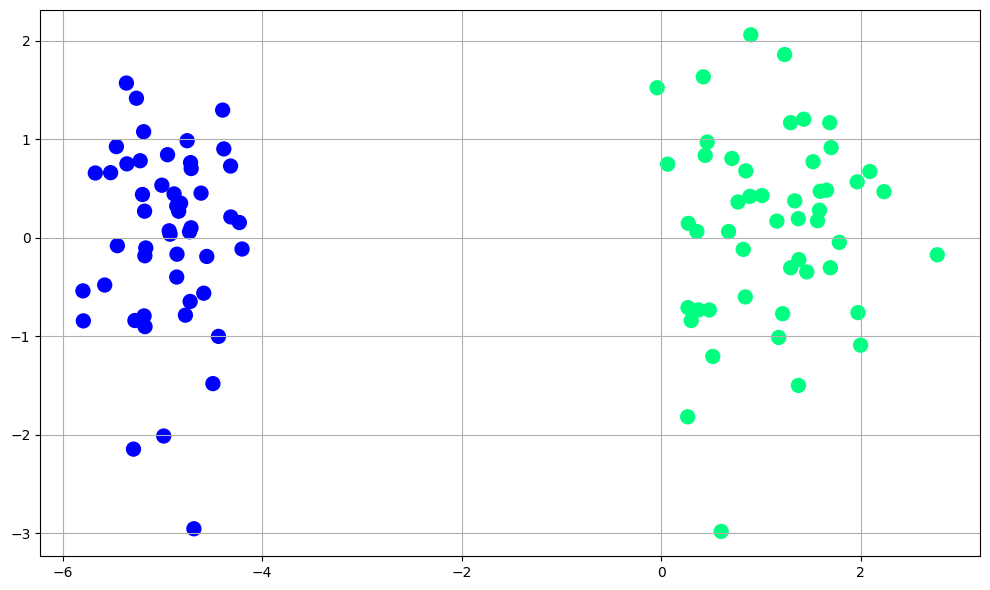

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.grid()
plt.tight_layout()

# **Perceptron trick with step function**

In [4]:
def step(z):
  return 1 if z>0 else 0

In [6]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
print(coef_,intercept_)

[1.08682872 0.52024363] 1.2000000000000002


In [9]:
m = -(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])

In [10]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input + b

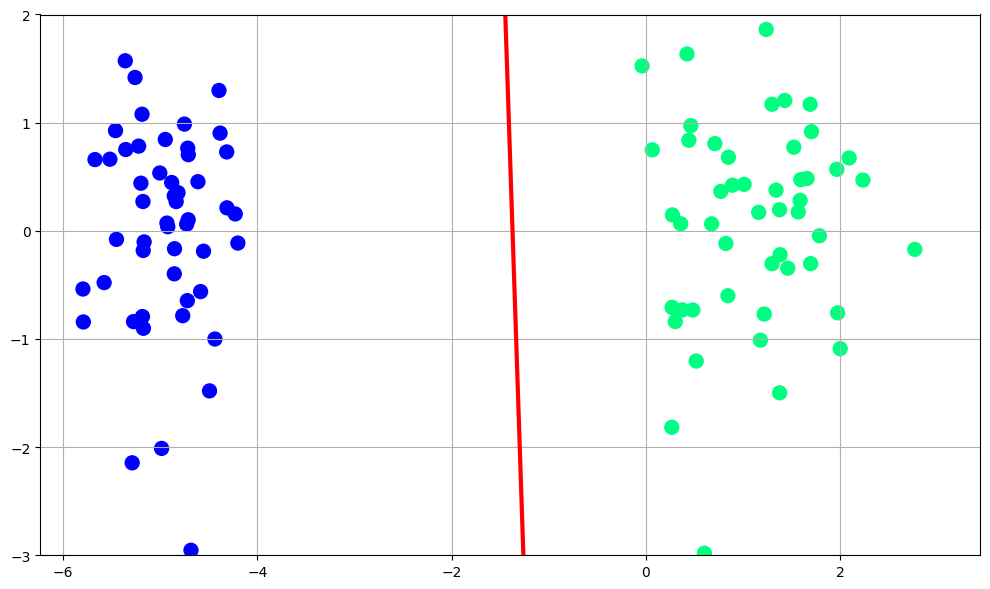

In [77]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.grid()
plt.tight_layout()

#**Comparison of Logistic Regression and Perceptron Trick**

In [12]:
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [13]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [14]:
X_input1 = np.linspace(-3,3,100)
y_input1 = m*X_input + b

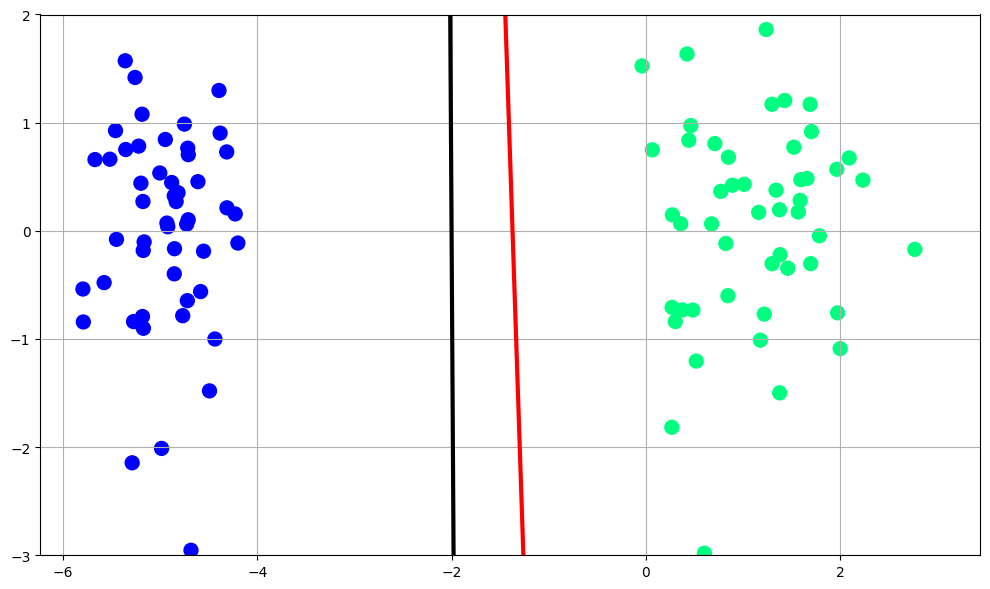

In [76]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.plot(X_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.grid()
plt.tight_layout()

# **Perceptron trick with sigmoid function**

In [16]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [39]:
def perceptronWithSigmoid(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [18]:
intercept_,coef_ = perceptron(X,y)

In [19]:
print(intercept_)
print(coef_)

2.6210284207583294
[2.2982328  0.17929509]


#**Camparison of Perceptron Trick(Step Function), Logistic Regression, Perceptron Trick(Sigmoid Function)**

In [20]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [21]:
X_input2 = np.linspace(-3,3,100)
y_input2 = m*X_input + b

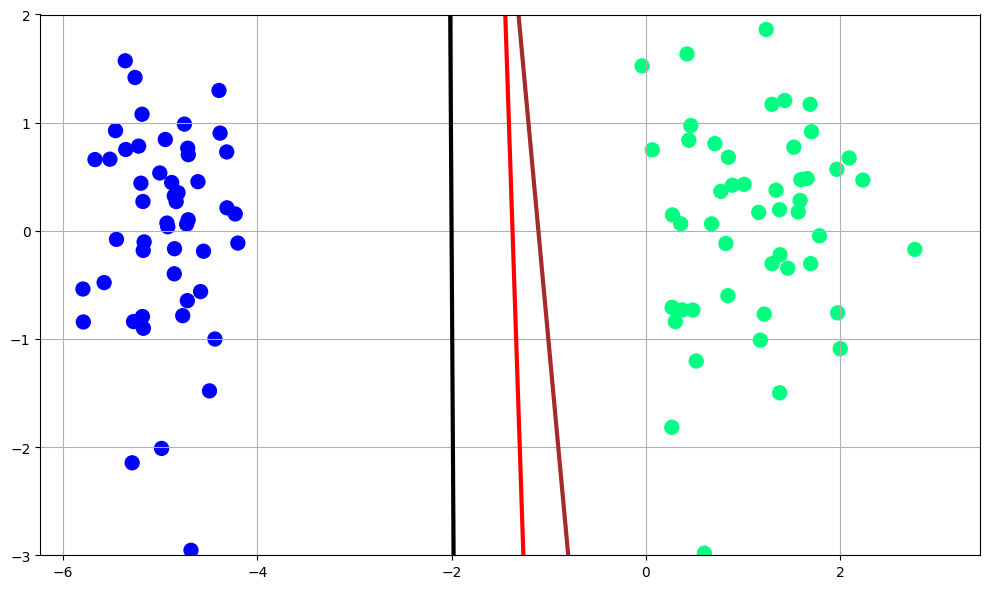

In [75]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.plot(X_input1,y_input1,color='black',linewidth=3)
plt.plot(X_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.grid()
plt.tight_layout()

# **Gredient Decent with Sigmoid function**

In [25]:
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [26]:
print(lor.coef_)
print(lor.intercept_)

[[3.61845587 0.14512471]]
[4.28176923]


In [28]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [29]:
X_input = np.linspace(-3,3,100)
y_input = m1 *X_input+ b1

In [30]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(2000):
      y_hat = sigmoid(np.dot(X,weights))
      weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [34]:
coef_,intercept_ =gd(X,y)

In [36]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [38]:
X_input1 = np.linspace(-3,3,100)
y_input = m * X_input1 + b

In [45]:
intercept,coef = perceptronWithSigmoid(X,y)

In [46]:
print(coef)
print(intercept)

[2.29214699 0.23480981]
2.538550806812719


In [47]:
m2 = -(coef[0]/coef[1])
b2 = -(intercept/coef[1])

In [65]:
X_input2 = np.linspace(-3,3,100)
y_input2 = m2 * X_input2 + b2

In [62]:
inte,co = perceptron(X,y)

In [63]:
print(inte,co)

2.5778143611292403 [2.33190794 0.14069115]


In [64]:
m3 = -(co[0]/co[1])
b3 = -(inte/co[1])

In [66]:
X_input3 = np.linspace(-3,3,100)
y_input3 = m3 * X_input3 + b3

# **Comparison between Logistic Regression, Gredient Descent with loss function, Perceptron Trick with sigmoid function, Perceptron Trick with Step function**

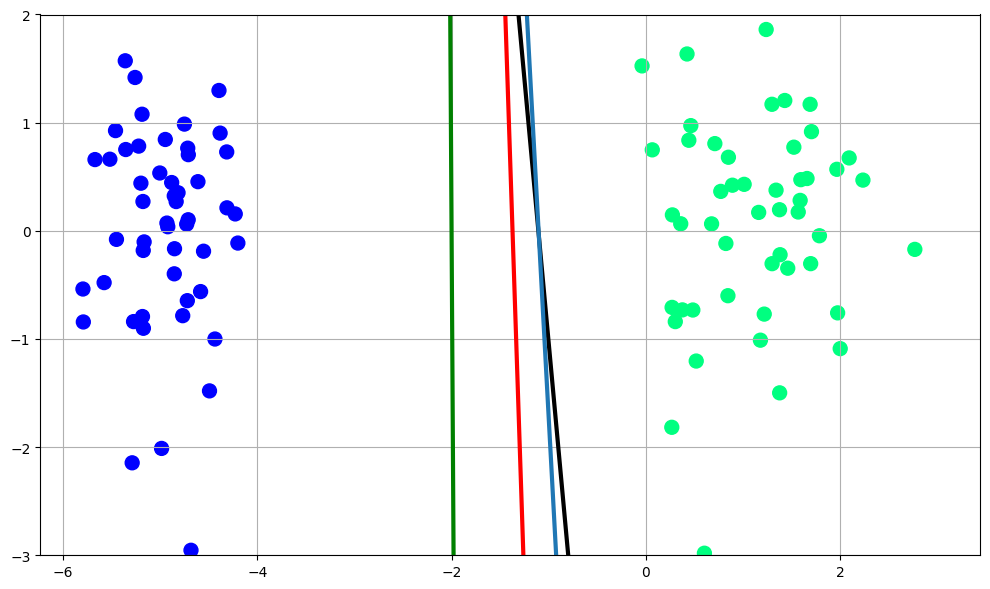

In [79]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',label='Logistic Regression',linewidth=3)# Logistic Regression
plt.plot(X_input1,y_input1,color='green',linewidth=3)# Gredient Descent with loss function
plt.plot(X_input2,y_input2,color='black',linewidth=3)# Perceptron Trick with sigmoid function
plt.plot(X_input3,y_input3,linewidth=3)# Perceptron Trick with Step function
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.grid()
plt.tight_layout()